## Data Exploration

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
rawData = pd.read_csv('xAPI-Edu-Data.csv')

In [3]:
rawData.tail().T

,475,476,477,478,479
gender,F,F,F,F,F
NationalITy,Jordan,Jordan,Jordan,Jordan,Jordan
PlaceofBirth,Jordan,Jordan,Jordan,Jordan,Jordan
StageID,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool,MiddleSchool
GradeID,G-08,G-08,G-08,G-08,G-08
SectionID,A,A,A,A,A
Topic,Chemistry,Geology,Geology,History,History
Semester,S,F,S,F,S
Relation,Father,Father,Father,Father,Father
raisedhands,5,50,55,30,35


In [4]:
rawData.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 67.5+ KB


In [6]:
rawData.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


###  Catagorical variables

In [7]:
cat_Vars = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID','Relation', 'GradeID', 'Topic', 'Semester', 'StudentAbsenceDays']

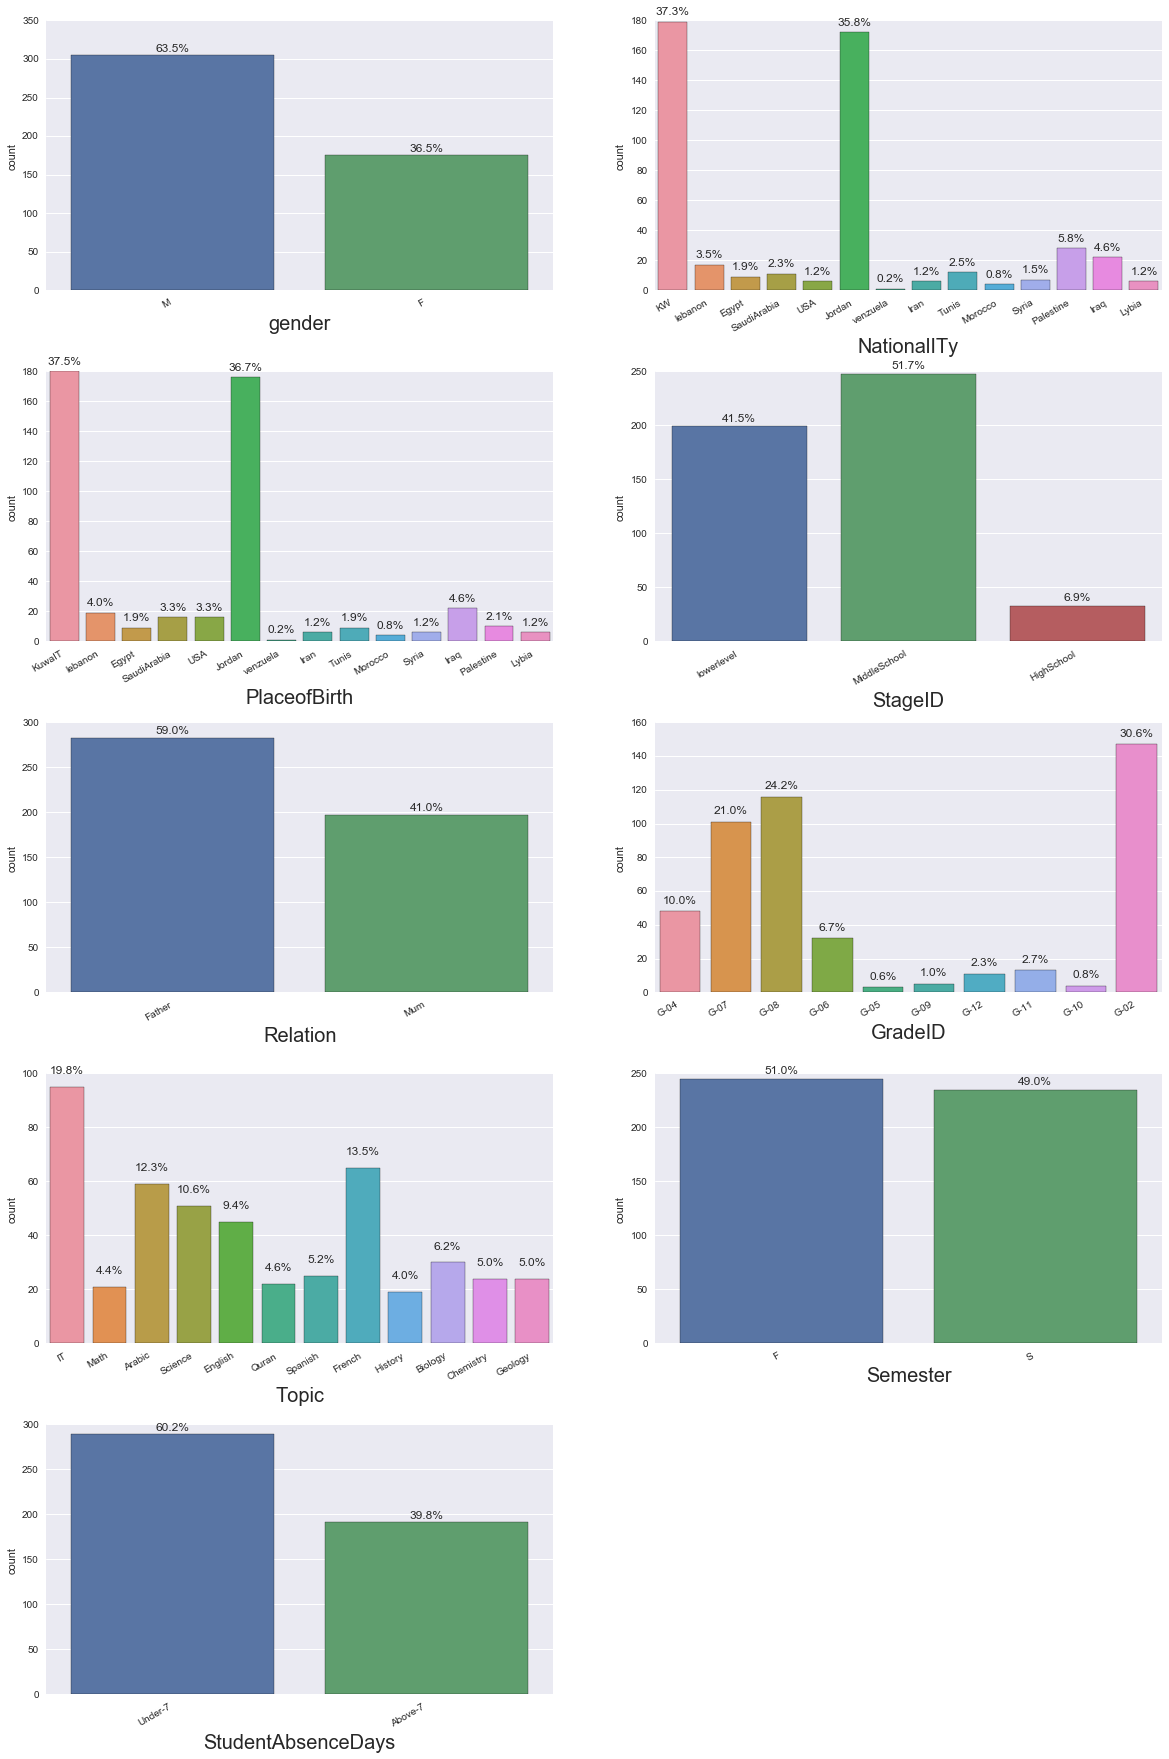

In [8]:
fig = plt.figure(figsize=(20, 30))
fig.subplots_adjust(hspace=.3, wspace=0.2)

for i in range(1,len(cat_Vars)+1,1):
    ax = fig.add_subplot(5, 2, i,)
    sns.countplot(rawData[cat_Vars[i-1]])
    ax.xaxis.label.set_size(20)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    total = float(len(rawData))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 5,'{:1.1f}%'.format(100 * height/total),ha="center")


#### Based on the the above plots several observations can be made:
    -Majority of students are male
    -Most of the students are from either Kuwait or Jordan
    -Majority of students are middleschool or lower

### Numerical Variables

In [9]:
num_Vars = [ 'raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion', 'Class']

# fig = plt.figure(figsize=(10, 10))
# for i in range(1,len(num_Vars)+1,1):
#     ax = fig.add_subplot(2, 2, i)
#     sns.distplot(rawData[num_Vars[i-1]],kde= None)

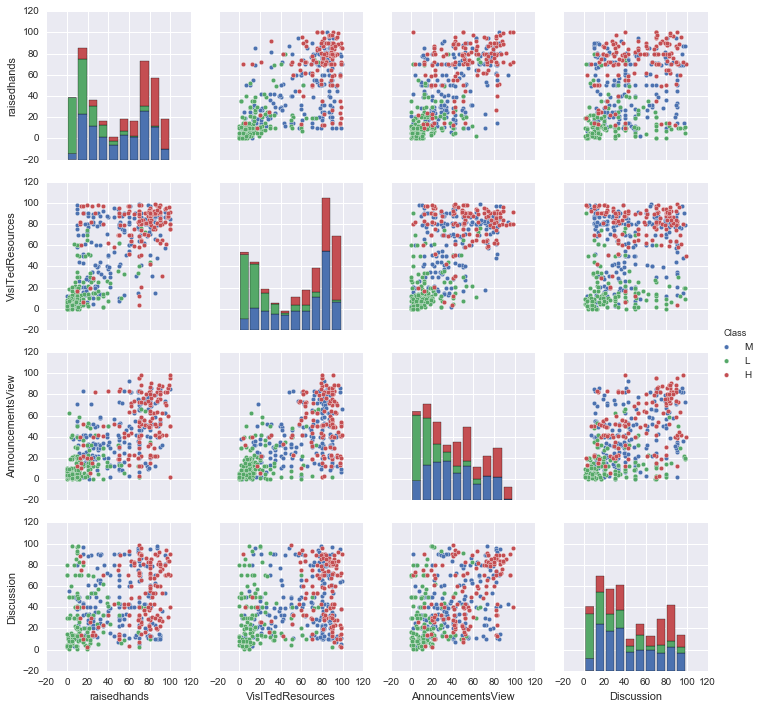

In [10]:
sns.pairplot(rawData[num_Vars], hue='Class')

In general these features represent the level of student particapation in their respective courses. 
Cleary the students with low grades tend to have lower level of class particapation.

## Lets try to figure out which feauters are most important (if any) for predicting students' academic perfomance.

Lets predict student perfomance using scikit random forest classifier

In [11]:
target = rawData.pop('Class') # target

# Drop the features not relevant to the student perfomance
rawData.drop(rawData[['ParentAnsweringSurvey', 'ParentschoolSatisfaction']], axis=1, inplace=True)

X = pd.get_dummies(rawData) # get numeric dummy variables for categorical data

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(target) # encode target labels with a value

In [13]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.40) # split data set into train and set
X_train.shape, X_test.shape

((288, 68), (192, 68))

### Cross-Validation to determine the best model parameter values

In [14]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : [1, 5,10, 50],
    
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, refit=True)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}

In [15]:
#CV_rfc.grid_scores_

### Use best fit model parameters to make predictions on test set

In [16]:
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=100, oob_score = True)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
accuracy_score(y_test, pred)

0.78125

### Plot feature importance 

In [23]:
feature_importance = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=["Importance"])
feature_importance.head(8)

,Importance
raisedhands,0.130394
VisITedResources,0.144996
AnnouncementsView,0.109664
Discussion,0.089686
gender_F,0.016686
gender_M,0.017801
NationalITy_Egypt,0.001096
NationalITy_Iran,0.001862


In [18]:
feature_importance.sort('Importance', ascending=False, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


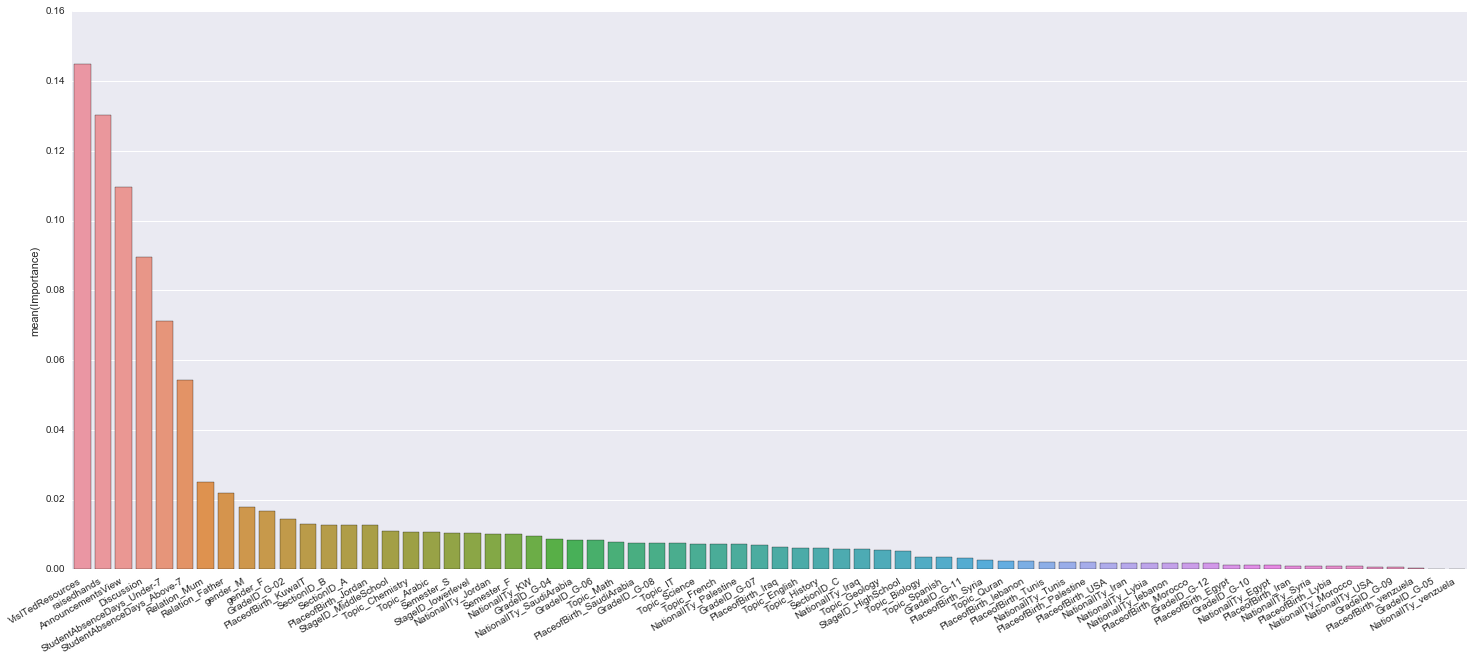

In [19]:
fig = plt.figure(figsize=(25, 10))
ax = sns.barplot(feature_importance.index, feature_importance['Importance'])
fig.add_axes(ax)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')[1]

### Quick test with xgboost classifier

In [20]:
import xgboost as xgb

xg_train = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix(X_test, label=y_test)

In [21]:
param = {}

# use softmax multi-class classification
param['objective'] = 'multi:softmax'

# set xgboost parameter values
param['eta'] = 0.1
param['max_depth'] = 9
param['silent'] = 1
param['nthread'] = 3
param['num_class'] = 3

num_round = 100
bst = xgb.train(param, xg_train, num_round)

# get prediction
pred = bst.predict( xg_test ).astype(int)
accuracy_score(y_test, pred)

0.765625

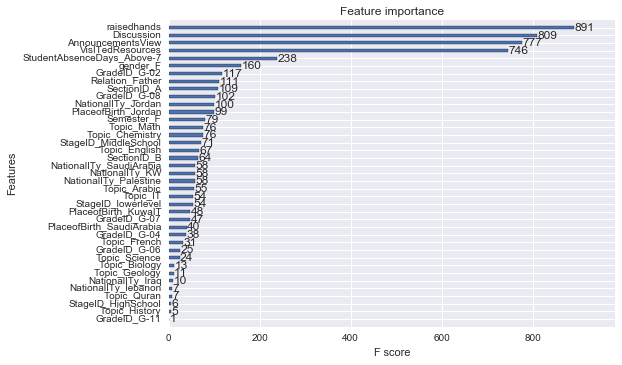

In [22]:
xgb.plot_importance(bst, height=0.4)

The features related to the student participation in the class are important in accurate prediction of the student
performance in any given course. (This is specific to the data set and the model we are using in this analysis.) 
This can be further tested by studying the variation in acuracy obtained by removing the important featues one by one from the model.